In [150]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [123]:
data = pd.read_csv('uniteevaluationfonciere.csv')
data = data[['CIVIQUE_DEBUT','NOM_RUE','NOMBRE_LOGEMENT','ANNEE_CONSTRUCTION','NO_ARROND_ILE_CUM']]
data.head()

,CIVIQUE_DEBUT,NOM_RUE,NOMBRE_LOGEMENT,ANNEE_CONSTRUCTION,NO_ARROND_ILE_CUM
0,2544,avenue Fletcher (MTL),1.0,2012.0,REM22
1,1908,boulevard Guy-Bouchard (LSL),1.0,1997.0,REM17
2,72,15e Rue (ROX),1.0,1958.0,REM31
3,105,avenue Parkdale (PCL),1.0,1974.0,REM99
4,45,13e Avenue (ROX),1.0,1955.0,REM31


In [124]:
borough_map = {
'REM05': 'Outremont',
'REM09': 'Anjou',
'REM12': 'Verdun',
'REM14': 'Saint-Léonard',
'REM15': 'Saint-Laurent',
'REM16': 'Montréal-Nord',
'REM17': 'LaSalle',
'REM19': 'Ville-Marie',
'REM20': 'Le Sud-Ouest',
'REM21': 'Le Plateau-Mont-Royal',
'REM22': 'Mercier--Hochelaga-Maisonneuve',
'REM23': 'Ahuntsic-Cartierville',
'REM24': 'Rosemont--La Petite-Patrie',
'REM25': 'Villeray--Saint-Michel--Parc-Ext.',
'REM27': 'Lachine',
'REM31': 'Pierrefonds-Roxboro',
'REM32': 'L\'Île-Bizard--Sainte-Geneviève',
'REM33': 'Riv.-Prairies-Pte-aux-Trembles',
'REM34': 'Côte-des-Neiges-Notre-Dame-de-Grâce'
}

data["NOM_ARROND"] = data["NO_ARROND_ILE_CUM"].map(borough_map)
data.head()

,CIVIQUE_DEBUT,NOM_RUE,NOMBRE_LOGEMENT,ANNEE_CONSTRUCTION,NO_ARROND_ILE_CUM,NOM_ARROND
0,2544,avenue Fletcher (MTL),1.0,2012.0,REM22,Mercier--Hochelaga-Maisonneuve
1,1908,boulevard Guy-Bouchard (LSL),1.0,1997.0,REM17,LaSalle
2,72,15e Rue (ROX),1.0,1958.0,REM31,Pierrefonds-Roxboro
3,105,avenue Parkdale (PCL),1.0,1974.0,REM99,NaN
4,45,13e Avenue (ROX),1.0,1955.0,REM31,Pierrefonds-Roxboro


In [125]:
data[['Street', 'Trigram']] = data['NOM_RUE'].str.split('(',expand=True)
data.drop('Street', axis=1, inplace=True)
data['Trigram'] = data['Trigram'].str.rstrip(')')
data.head()

,CIVIQUE_DEBUT,NOM_RUE,NOMBRE_LOGEMENT,ANNEE_CONSTRUCTION,NO_ARROND_ILE_CUM,NOM_ARROND,Trigram
0,2544,avenue Fletcher (MTL),1.0,2012.0,REM22,Mercier--Hochelaga-Maisonneuve,MTL
1,1908,boulevard Guy-Bouchard (LSL),1.0,1997.0,REM17,LaSalle,LSL
2,72,15e Rue (ROX),1.0,1958.0,REM31,Pierrefonds-Roxboro,ROX
3,105,avenue Parkdale (PCL),1.0,1974.0,REM99,NaN,PCL
4,45,13e Avenue (ROX),1.0,1955.0,REM31,Pierrefonds-Roxboro,ROX


In [126]:
data[data['NO_ARROND_ILE_CUM'] == 'REM99'].Trigram.unique()

array(['PCL', 'DVL', 'MTR', 'CSL', 'MTL+WMT', 'BCF', 'KRK', 'DDO',
       'CSL+MTL', 'BCF+BDU+DVL+KRK+MTL+PCL+SAB+SLR+SNV', 'MTO', 'SNV',
       'WMT', 'DDO+PFD', 'HMS', 'BDU', 'MTL+MTR', 'MTE', 'CSL+MTL+MTO',
       'KRK+PFD', 'SAB', 'BCF+KRK', 'DDO+PCL+PFD', 'CSL+HMS+MTL',
       'MTE+PAT', 'MTL+MTR+OUT', 'DVL+KRK+PCL+SLR', 'CSL+HMS+MTL+MTO',
       'DDO+PCL', 'DDO+KRK', 'BCF+KRK+SAB', 'KRK+PFD+SAB', 'CSL+MTO',
       'IDV', 'DDO+DVL+PCL+PFD+ROX', 'MTE+MTL', 'MTL+MTO+WMT', 'BDU+SAB',
       None, 'DVL+LCH', 'DVL+PCL', 'DVL+LCH+MTR+SLR',
       'BCF+BDU+DVL+LCH+MTL+MTO+PCL+SAB+VRD', 'ANJ+MTE+MTL+SLN',
       'KRK+PFD+SGV', 'SAB+SNV', 'ANJ+MTE+MTL+MTN', 'CSL+MTL+MTR',
       'MTR+SLR', 'LCH+MTL+MTO', 'MTL+MTO'], dtype=object)

In [127]:
data_99 = data[data['NO_ARROND_ILE_CUM'] == 'REM99']
data = data[data['NO_ARROND_ILE_CUM'] != 'REM99']

In [133]:
other_borough_map = {
    'PCL': 'Pointe-Claire', 
    'HMS': 'Hampstead',
    'SNV': 'Senneville',
    'DVL': 'Dorval', 
    'MTE': 'Montréal-Est',
    'MTR': 'Mont-Royal', 
    'CSL': 'Côte St-Luc', 
    'MTL+WMT': 'Westmount', 
    'BCF': 'Beaconsfield', 
    'KRK': 'Kirkland',
    'DDO': 'Dollard-des-Ormeaux',
    'CSL+MTL': 'Côte St-Luc',  
    'MTO': 'Montréal-Ouest', 
    'WMT': 'Westmount', 
    'DDO+PFD': 'Dollard-des-Ormeaux',
    'BDU': 'Baie d\'Urfé', 
    'MTL+MTR':'Mont-Royal',
    'SAB': 'Ste-Anne-de-Bellevue'
}

data_99["NOM_ARROND"] = data_99.Trigram.map(other_borough_map)
data = data.append(data_99)
data.drop(['Trigram', 'NO_ARROND_ILE_CUM', 'CIVIQUE_DEBUT'], axis=1, inplace=True)
data.head()

,ANNEE_CONSTRUCTION,NOMBRE_LOGEMENT,NOM_ARROND,NOM_RUE
0,2012.0,1.0,Mercier--Hochelaga-Maisonneuve,avenue Fletcher (MTL)
1,1997.0,1.0,LaSalle,boulevard Guy-Bouchard (LSL)
2,1958.0,1.0,Pierrefonds-Roxboro,15e Rue (ROX)
4,1955.0,1.0,Pierrefonds-Roxboro,13e Avenue (ROX)
6,1923.0,1.0,Outremont,avenue Courcelette (OUT)


In [134]:
data.NOM_ARROND.unique()

array(['Mercier--Hochelaga-Maisonneuve', 'LaSalle', 'Pierrefonds-Roxboro',
       'Outremont', 'Le Sud-Ouest', 'Rosemont--La Petite-Patrie',
       'Saint-Laurent', 'Ville-Marie', 'Anjou',
       'Riv.-Prairies-Pte-aux-Trembles',
       'Côte-des-Neiges-Notre-Dame-de-Grâce', 'Ahuntsic-Cartierville',
       'Villeray--Saint-Michel--Parc-Ext.', 'Lachine', 'Verdun',
       'Saint-Léonard', 'Montréal-Nord', 'Le Plateau-Mont-Royal',
       "L'Île-Bizard--Sainte-Geneviève", 'Pointe-Claire', 'Dorval',
       'Mont-Royal', 'Côte St-Luc', 'Westmount', 'Beaconsfield',
       'Kirkland', 'Dollard-des-Ormeaux', nan, 'Montréal-Ouest',
       'Hampstead', "Baie d'Urfé", 'Ste-Anne-de-Bellevue', 'Montréal-Est',
       'Senneville'], dtype=object)

In [136]:
bucket_map = {
    'Montréal-Est': 0,
    'Hampstead': 0,
    'Senneville': 0,
    'Kirkland': 0,
    'Ste-Anne-de-Bellevue': 0,
    'Montréal-Ouest': 0,
    'Côte St-Luc': 0, 
    'Beaconsfield': 0, 
    "Baie d'Urfé": 0, 
    "L'Île-Bizard--Sainte-Geneviève": 0, 
    'Villeray--Saint-Michel--Parc-Ext.': 1, 
    'Mercier--Hochelaga-Maisonneuve': 1, 
    'Ahuntsic-Cartierville': 1,
    'Ville-Marie': 2, 
    'Verdun': 3,
    'Saint-Léonard': 3, 
    'Riv.-Prairies-Pte-aux-Trembles': 3,
    'Le Sud-Ouest': 3, 
    'Montréal-Nord': 3, 
    'LaSalle': 3, 
    'Le Plateau-Mont-Royal': 4,
    'Rosemont--La Petite-Patrie': 4,
    'Côte-des-Neiges-Notre-Dame-de-Grâce': 5,
    'Pierrefonds-Roxboro': 6,
    'Outremont': 6, 
    'Anjou': 6,
    'Lachine': 6, 
    'Pointe-Claire': 6, 
    'Dorval': 6,
    'Mont-Royal': 6, 
    'Westmount': 6, 
    'Dollard-des-Ormeaux': 6, 
    'Saint-Laurent': 7
}

data["BUCKET"] = data.NOM_ARROND.map(bucket_map)
data.head()

,ANNEE_CONSTRUCTION,NOMBRE_LOGEMENT,NOM_ARROND,NOM_RUE,BUCKET
0,2012.0,1.0,Mercier--Hochelaga-Maisonneuve,avenue Fletcher (MTL),1.0
1,1997.0,1.0,LaSalle,boulevard Guy-Bouchard (LSL),3.0
2,1958.0,1.0,Pierrefonds-Roxboro,15e Rue (ROX),6.0
4,1955.0,1.0,Pierrefonds-Roxboro,13e Avenue (ROX),6.0
6,1923.0,1.0,Outremont,avenue Courcelette (OUT),6.0


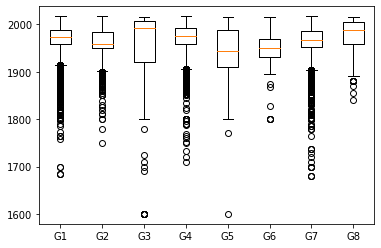

In [160]:
boxplot_field = 'ANNEE_CONSTRUCTION'
data = data.dropna()
plt.figure()
plt.boxplot([data[boxplot_field][data.BUCKET==0],
            data[boxplot_field][data.BUCKET==1],
            data[boxplot_field][data.BUCKET==2],
            data[boxplot_field][data.BUCKET==3],
            data[boxplot_field][data.BUCKET==4],
            data[boxplot_field][data.BUCKET==5],
            data[boxplot_field][data.BUCKET==6],
            data[boxplot_field][data.BUCKET==7]],
            labels=('G1','G2','G3','G4','G5','G6','G7','G8'));